<a href="https://colab.research.google.com/github/UrielAnd/Inteligancia_Artificial/blob/main/weather_nominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.2 MB 4.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Converte dados binários OU não binários ordinais
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import pickle

In [ ]:
base_dados = pd.read_csv("/content/sample_data/weather.nominal.csv", ";", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
base_dados

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
base_dados.head(3)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes


In [ ]:
base_dados.tail(2)

,outlook,temperature,humidity,windy,play
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


In [ ]:
np.unique(base_dados["play"], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

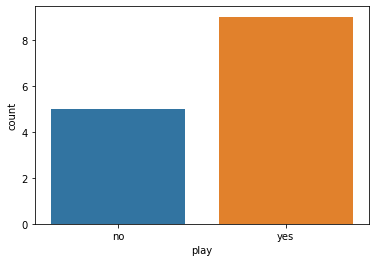

In [ ]:
sns.countplot(x = base_dados["play"]);

In [ ]:
X_prev = base_dados.iloc[:, 0:4].values 
#Pegando apenas os valores das 10 primeiras linhas
# Imprime todas as linhas das colunas 0 a 10
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cool', 'normal', False],
       ['rainy', 'cool', 'normal', True],
       ['overcast', 'cool', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cool', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [ ]:
X_prev_label = base_dados.iloc[:, 0:4]
X_prev_label

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [ ]:
X_prev[:,1] # Imprime todas as linhas da coluna 5 (tirando o header)

array(['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild',
       'cool', 'mild', 'mild', 'mild', 'hot', 'mild'], dtype=object)

In [ ]:
Y_classe = base_dados.iloc[:, 4].values # Entrada = X_Prev Saída = Y_classe
Y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:

X_prev[:, 1]

X_prev[:, 2] = label_encoder.fit_transform(X_prev[:, 2])
X_prev[:, 3] = label_encoder.fit_transform(X_prev[:, 3])


X_prev

array([['sunny', 'hot', 0, 0],
       ['sunny', 'hot', 0, 1],
       ['overcast', 'hot', 0, 0],
       ['rainy', 'mild', 0, 0],
       ['rainy', 'cool', 1, 0],
       ['rainy', 'cool', 1, 1],
       ['overcast', 'cool', 1, 1],
       ['sunny', 'mild', 0, 0],
       ['sunny', 'cool', 1, 0],
       ['rainy', 'mild', 1, 0],
       ['sunny', 'mild', 1, 1],
       ['overcast', 'mild', 0, 1],
       ['overcast', 'hot', 1, 0],
       ['rainy', 'mild', 0, 1]], dtype=object)

In [ ]:
onehotencoder_rest = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1])], remainder="passthrough")
# Passamos como argumento as colunas que gostaríamos de binarizar

In [ ]:
X_prev = onehotencoder_rest.fit_transform(X_prev)
X_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [ ]:
X_prev.shape # Mostra a quantidade de linhas e colunas

(14, 8)

In [ ]:
Y_classe
Y_classe.shape

(14,)

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_prev, Y_classe, test_size = 0.20, random_state=0)
# Random state = 0 = toda vez que rodarmos ele gera outra instância
# X_treino = atributos para treinar
# Y_treino = classe objetivo dos atributos de treino
# Y = atributos de saída

# X_teste = atributos do teste
# Y_teste = classe objetivo dos atributos de teste

print(X_treino.shape)
X_teste.shape

(11, 8)


(3, 8)

In [ ]:
X_treino.shape

(11, 8)

In [ ]:
X_teste.shape

(3, 8)

In [ ]:
Y_treino.shape

(11,)

In [ ]:
Y_teste.shape

(3,)

In [ ]:
with open('weather.nominal.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, Y_treino, Y_teste], f)